In [1]:
import matplotlib.pyplot as plt # static, animated, and interactive visualization
import numpy as np # linear algebra
import pandas as pd #data processing CSV files I/O (pd.read_csv)
import plotly.express as px
import os

#Missingno is a Python library that provides the ability to understand the distribution of missing values through informative
# visualizations. The visualizations can be in the form of heat maps or bar charts
import missingno as msmo 

In [ ]:
#magic functions
# will make your plot outputs appear and be stored within the notebook.
%matplotlib inline

# format code nb_black 
%load_ext lab_black

In [4]:
# get the path of the curren working directory
presentWorkingDirectory = os.getcwd()

print(presentWorkingDirectory)

c:\Users\LAVAS\Desktop\CMPG323 - IT DEVELOPMENT\Projects\Project 5\Project_5_Reporting_&_Monitoring\Python


In [3]:
dfzone = pd.read_excel(presentWorkingDirectory+"\Dataset\zones.xlsx")
dfdevice = pd.read_excel(presentWorkingDirectory+"\Dataset\devices.xlsx")
dfcategory = pd.read_excel(presentWorkingDirectory+"\Dataset\categories.xlsx")
dfsubCategory = pd.read_excel(presentWorkingDirectory+"\Dataset\subCategories.xlsx")
full_ds = pd.concat([dfzone,dfdevice,dfcategory,dfsubCategory],ignore_index=True)

<AxesSubplot:>

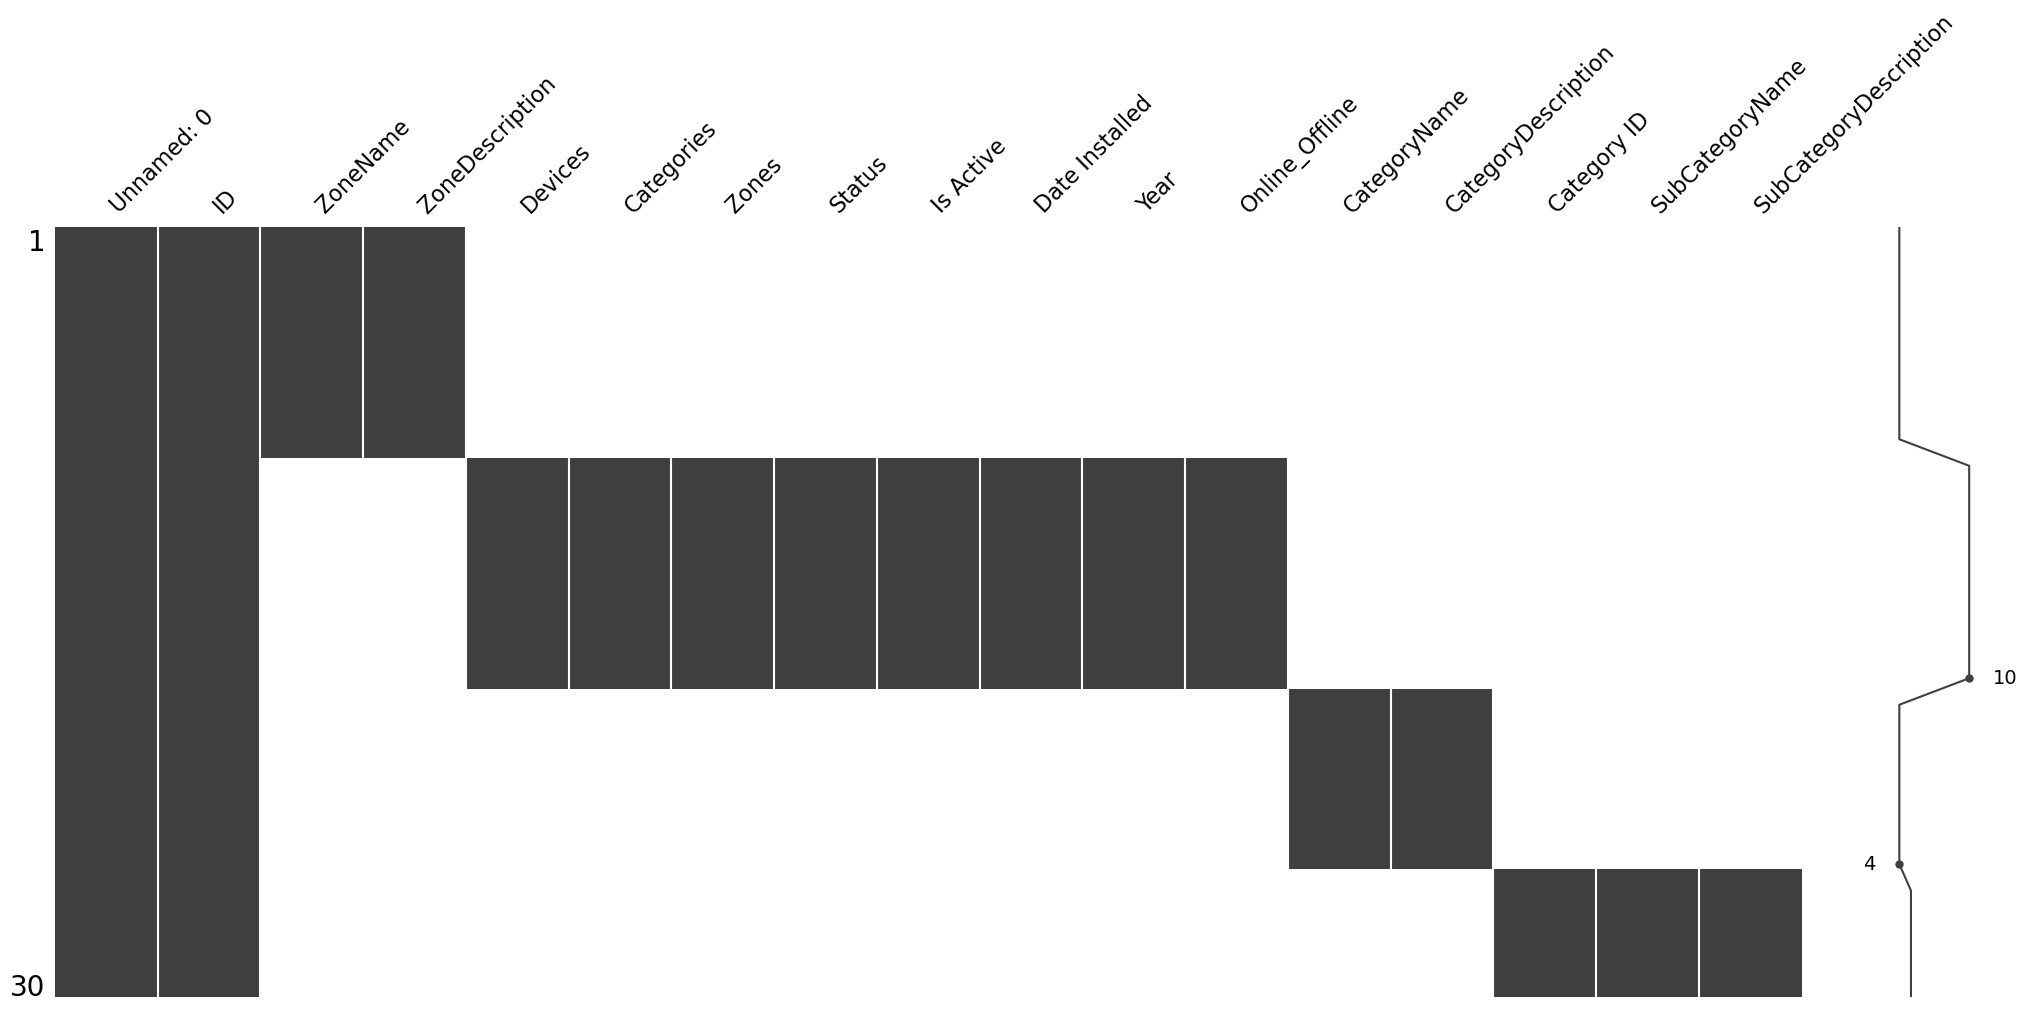

In [4]:
# check missing values
# Visualize missing values as a matrix
msmo.matrix(full_ds)

In [5]:
# Remove duplicate
dfzone.drop_duplicates()
dfdevice.drop_duplicates()
dfcategory.drop_duplicates()
dfsubCategory.drop_duplicates()

,Unnamed: 0,ID,Category ID,SubCategoryName,SubCategoryDescription
0,0,SC01,C05,Camera,Visual monitoring tool
1,1,SC02,C01,Temperature Sensor,Measuring air temp
2,2,SC03,C01,Motion Sensor,Monitoring for motion to trigger action
3,3,SC04,C05,Access Control,Managing access for people entering and exitin...
4,4,SC05,C01,Speed Sensor,Measuring speed of moving object


In [6]:
# count the number of devices registered
devices_count = dfdevice['Devices'].count()
print(devices_count)

9


In [7]:
# Count the number of categories
category_count = dfcategory['CategoryName'].count()
print(category_count)

7


In [8]:
# Count the number of zones
zone_count = dfzone['ZoneName'].count()
print(zone_count)

9


In [9]:
# how many device in a zone
count_devices_in_zone = dfdevice.groupby('Zones')['Devices'].count()
count_devices_in_zone.to_frame()

,Devices
Zones,
Boilermaker Room,1
Environmental Office,1
Labor Office,1
Linemen Assembly,1
Safety Office,1
Stucco Mason Building,2
Terrazzo,1
Tile Setting Bench,1


In [10]:
# helper function - plot a bar graph to monitor the number of device in selection {category, zone}
def plot_bar(selection):
    fig = px.bar(dfdevice, x=selection, title='Number of devices in '+ selection, color='Devices')
    fig.show()

In [11]:
# visual to monitor device per category

selectionCategory = 'Categories'
plot_bar(selectionCategory)


In [12]:
# visual to monitor device per zone
selectionZone = 'Zones'
plot_bar(selectionZone)

In [13]:
# visual to monitor online v offline devices

# plot a bar graph for device online and offline
fig = px.bar(dfdevice, x='Online_Offline', title='online vso ffline devices ', color='Devices')
fig.show()

In [15]:
# plot a line graph of the number of device installed in a zone by yeat


fig = px.bar(dfdevice, x='Year', title='Number of device in zone by year ', color='Devices')
fig.show()